In [1]:
import sys
sys.path.insert(0, "../..")

In [2]:
from MPyDATA_examples.condensational_growth.analysis import analysis
from MPyDATA_examples.condensational_growth.physics.equilibrium_drop_growth import PdfEvolver
from MPyDATA_examples.condensational_growth.plotter import Plotter

In [3]:
plot_data, setup = analysis()

No handles with labels found to put in legend.


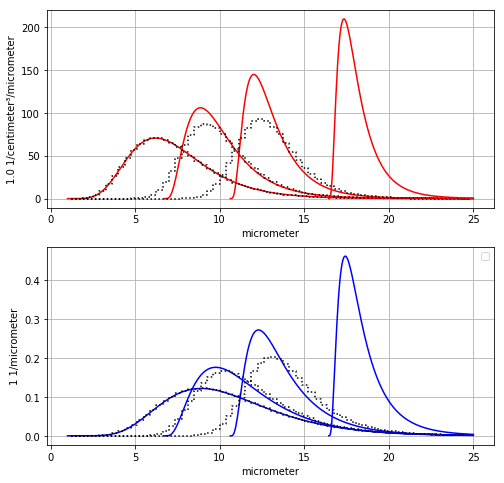

In [4]:
plotter = Plotter(setup.r_min, setup.r_max, '', setup.si)

for i in range(len(setup.nt)):
    mnorm = setup.mixing_ratios[i]
    t = setup.nt[i] * setup.dt
    plotter.analytical_pdf(PdfEvolver(setup.pdf, setup.drdt, t), mnorm)
    plotter.numerical_pdf(plot_data['r'], plot_data['n'][i], label='', bin_boundaries=plot_data['rh'], mnorm=mnorm)
plotter.done()